In [26]:
import pymongo
import datetime
from matplotlib.ticker import MaxNLocator, AutoMinorLocator
connection = pymongo.MongoClient()
connection.database_names()

['admin', 'crypto_trade', 'local']

In [2]:
db = connection["crypto_trade"]
neo_btc_collection = db["NEOBTC"]

In [3]:
for post in neo_btc_collection.find().limit(10):
    print (post)

{'f': 4557013, 'M': True, 'q': '1.04000000', 'e': 'aggTrade', 'E': 1515096584380, 'a': 4148691, 's': 'NEOBTC', 'm': True, 'T': 1515096584363, 'p': '0.00675700', 'l': 4557013, '_id': ObjectId('5a4e8a0ce0a3bd7b6dc0081f')}
{'f': 4557014, 'M': True, 'q': '1.51000000', 'e': 'aggTrade', 'E': 1515096584380, 'a': 4148692, 's': 'NEOBTC', 'm': True, 'T': 1515096584363, 'p': '0.00675600', 'l': 4557015, '_id': ObjectId('5a4e8a0ce0a3bd7b6dc00821')}
{'f': 4557016, 'M': True, 'q': '1.75000000', 'e': 'aggTrade', 'E': 1515096585553, 'a': 4148693, 's': 'NEOBTC', 'm': True, 'T': 1515096585546, 'p': '0.00675600', 'l': 4557016, '_id': ObjectId('5a4e8a0fe0a3bd7b6dc00879')}
{'f': 4557017, 'M': True, 'q': '1.00000000', 'e': 'aggTrade', 'E': 1515096589420, 'a': 4148694, 's': 'NEOBTC', 'm': False, 'T': 1515096589413, 'p': '0.00677000', 'l': 4557017, '_id': ObjectId('5a4e8a15e0a3bd7b6dc009a4')}
{'f': 4557018, 'M': True, 'q': '0.02000000', 'e': 'aggTrade', 'E': 1515096592542, 'a': 4148695, 's': 'NEOBTC', 'm': Tru

In [4]:
time_series = []
price_series = []
for post in neo_btc_collection.find().sort("T", -1):
    time_series.append(post["T"])
    price_series.append(post["p"])
    

In [5]:
%matplotlib notebook

In [6]:
import matplotlib.pylab as plt 
from matplotlib.ticker import LinearLocator

<IPython.core.display.Javascript object>


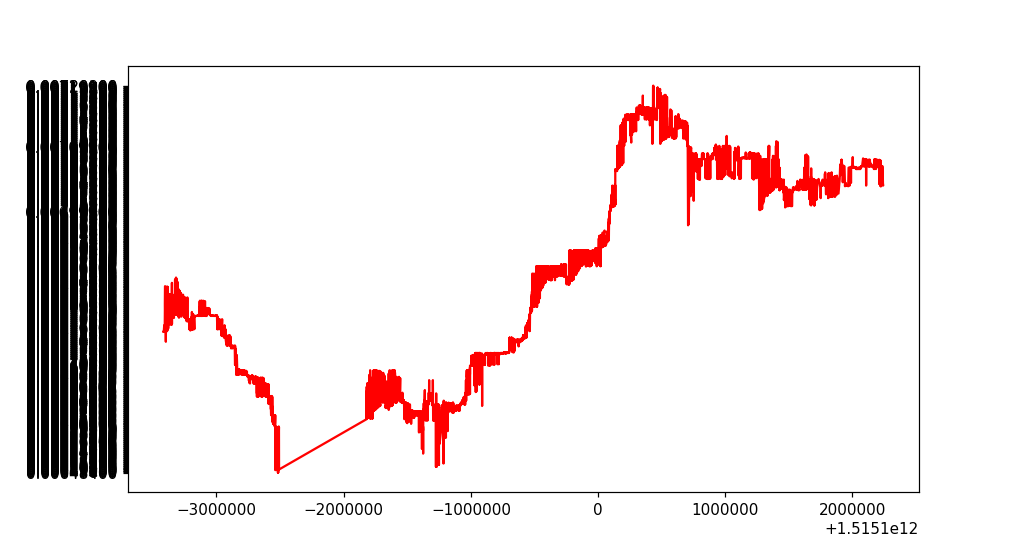

In [7]:
plt.plot(time_series, price_series, "r-")

In [8]:
from bokeh.charts import Line, output_file, show

ImportError: No module named 'bokeh.charts'

04:02 01:39
0.00720100 0.00648400


<IPython.core.display.Javascript object>


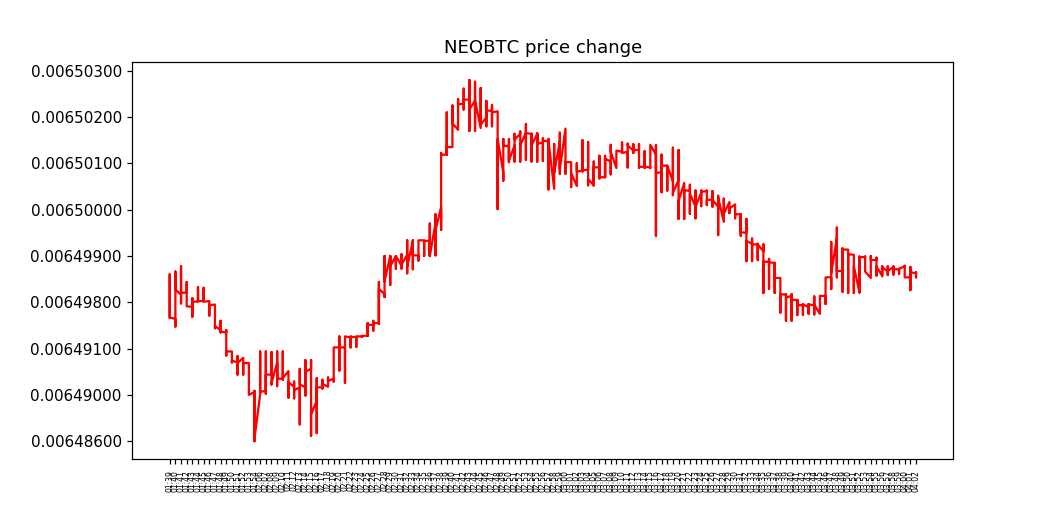

04:02 01:39
0.00001347 0.00000988


<IPython.core.display.Javascript object>


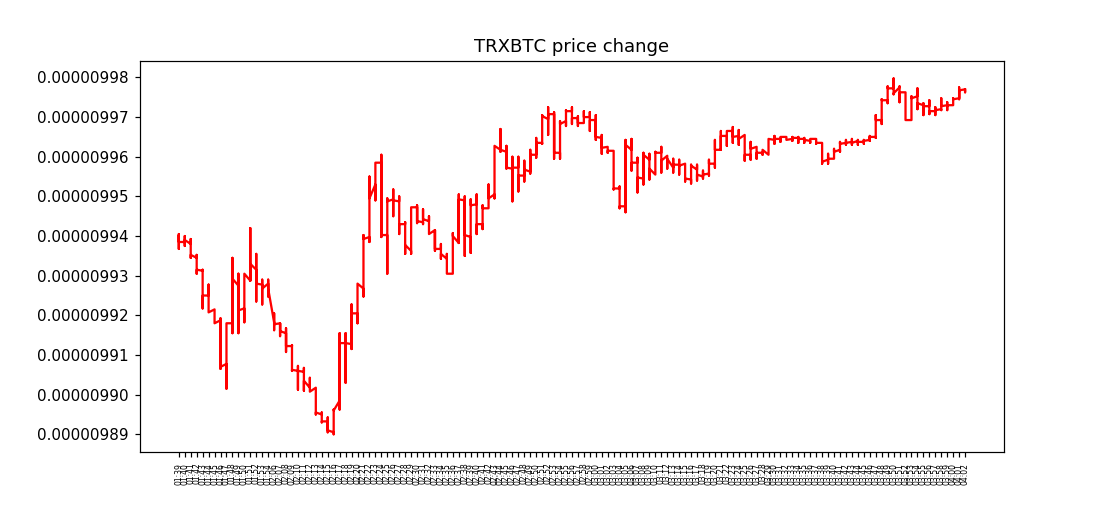

In [48]:
import numpy as np
def format_time_stamp(x): 
    g = float("%s.%s"%(str(x)[0:10], str(x)[10:]))
    #return datetime.datetime.fromtimestamp(g).strftime('%Y-%m-%d %H:%M:%S')
    return datetime.datetime.fromtimestamp(g).strftime('%H:%M')


    
    
def plot(currency_name):
    minorLocator = AutoMinorLocator()
    collection = db[currency_name]
    time_series = []
    price_series = []
    for post in collection.find().sort("T", -1):
        time_series.append(post["T"])
        price_series.append(post["p"])

    x_axis = list(map(format_time_stamp, time_series))
    print (max(x_axis), min(x_axis))
    print (max(price_series), min(price_series))
    
    fig = figure()
    axs = fig.add_subplot(111)
    #fig, axs = plt.subplots(1,1)
    axs.set_title('%s price change'%currency_name)
    #axs.xaxis.set_minor_locator(minorLocator)
    #ticks(axs)
    #axs.xaxis.set_major_locator(MaxNLocator(10))
    axs.yaxis.set_major_locator(MaxNLocator(10))
    
    
    for tick in axs.xaxis.get_major_ticks():
            tick.label.set_fontsize(5) 
    #            # specify integer or one of preset strings, e.g.
    #            #tick.label.set_fontsize('x-small') 
            tick.label.set_rotation('vertical')

    #plt.tick_params(which='both', width=200)
    #plt.tick_params(which='major', length=10)
    #plt.tick_params(which='minor', length=10, color='r')
    plt.plot(x_axis, price_series, "r-")
    #axs.get_yaxis().set_major_locator(LinearLocator(numticks=12))
    #axs.get_xaxis().set_major_locator(LinearLocator(numticks=12))
    #axs.autoscale(enable=True, axis='both', tight=True)
    #plt.tight_layout()
    #plt.xlim([0, 30])

plot("NEOBTC")
plot("TRXBTC")

In [20]:
from pylab import figure, show
